# Questão 01

- Respostas da 2º Avaliação de SD - 2023 <br>
- Aluno: Matheus Victor Ferreira da Silva <br>
- Anunciado: Quais as diferenças entre MultiThread e MultiProcess? Faça um código em Python para multiplicar duas matrizes quadradas usando MultiThreads e MultiProcess. Altere os tamanho das matrizes de forma a mostrar o desempenho das duas abordagens. Ilustre o desempenho com um gráfico. O desempenho de cada uma pode ser mensurado pelo tempo para calcular a multiplicação.

## Bibliotecas

In [1]:
from random import randint
from threading import Thread
from time import time
from multiprocessing import Process
import pandas as pd
import matplotlib.pyplot as plt

## Função de Criar Matrizes

In [2]:
criaMatriz = lambda n, z=False: [[0 if z else randint(0, 99) for _ in range(n)] for _ in range(n)]

## Função de Multiplicar Matrizes

In [3]:
def linha(m1, m2, l, resultante):
    for i in range(len(m2)):
        for j in range(len(m2)):
            resultante[l][i] += m1[l][j] * m2[j][i]

In [4]:
def linhaFile(m1, m2, l, resultante):
    for i in range(len(m2)):
        for j in range(len(m2)):
            resultante[l][i] += m1[l][j] * m2[j][i]
            
    with open('tFile.txt', 'w') as f: # Zerar o arquivo para armazenar o tempo de cada processo.
        pass

    t = time()

    with open('resultante.txt', 'a') as f:
        f.write(f'{resultante[l]}\n')
    
    tempo = time() - t
    
    with open('tFile.txt', 'a') as f:
        f.write(f'{tempo}\n')

## Funções que chamam as funções de calcular linhas

A função multThrd cria uma thread para cada linha da matriz resultante, e cada thread chama a função multLinha, que calcula a linha da matriz resultante.

Da mesma forma, a função multProc cria um processo para cada linha da matriz resultante, e cada processo chama a função multLinha, que calcula a linha da matriz resultante. Como os processos não compartilham memória, eu não consegui pensar uma outra forma de calcular as linhas sem ser armazenando em um arquivo de texto e lendo depois. O arquivo "resultante.txt" armazena a matriz resultante com processos.

In [5]:
def multThrd(m1, m2, n):
    resultante = criaMatriz(n, z=True)
    lista = [Thread(target=linha, args=(m1, m2, i, resultante)) for i in range(n)]
    for t in lista:
        t.start()
    for t in lista:
        t.join()    
    return resultante

In [6]:
def multProcss(m1, m2, n):
    with open('resultante.txt', 'w') as f:
        resultante = criaMatriz(n, z=True)
        lista = [Process(target=linhaFile, args=(m1, m2, i, resultante)) for i in range(n)]
        for t in lista:
            t.start()
        for t in lista:
            t.join()

    with open('resultante.txt', 'r') as f:
        resultante = [list(map(int, line.strip('[]\n').split(', '))) for line in f.readlines()]

    return resultante

## Um teste

In [7]:
n = 2 # Tamanho das matrizes

In [8]:
m1, m2 = criaMatriz(n), criaMatriz(n) # São criadas duas matrizes aleatórias com tamanho 2x2

In [9]:
m1, m2 

([[19, 35], [11, 3]], [[39, 60], [62, 21]])

In [27]:
aux2 = multProcss(m1, m2, n)
aux2

[[2911, 1875], [615, 723]]

In [12]:
t = time()
aux = multThrd(m1, m2, n)
print(f"Tempo de execução: {time() - t}")
print(aux)

Tempo de execução: 0.0007653236389160156
[[2911, 1875], [615, 723]]


## Testes com diferentes tamanhos de matrizes

A função sel direciona as variáveis para as funções de multiplicação de matrizes de acordo com a opção determinada, se op for 1 então a multiplicação será realizada com threads, se op for 2 então a multiplicação será realizada com processos.

Os testes foram realizados com matrizes de tamanhos diferentes, começando com o tamanho 2x2 até a matriz de tamanho 50x50.

In [13]:
sel = lambda op, m1, m2, n: multThrd(m1, m2, n) if op == 1 else multProcss(m1, m2, n)
selFile = lambda op: 'threads.csv' if op == 1 else 'processos.csv'

In [14]:
def calcula(op, t):
    tempo = time() - t
    if op != 1:
        with open('tFile.txt', 'r') as f:
            tempo -= sum([float(line.strip('\n')) for line in f.readlines()])
    return tempo

In [15]:
def marcaTempo(m1, m2, n, op):
    t = time()
    _ = sel(op, m1, m2, n)
    with open(selFile(op), 'a') as f:
        f.write(f'{n},{calcula(op, t)}\n')

In [16]:
def testes(max=50):
    # Zero os arquivos para os testes
    with open('threads.csv', 'w') as f: pass
    with open('processos.csv', 'w') as f: pass
    for n in range(2, max+1):
        m1, m2 = criaMatriz(n), criaMatriz(n)
        marcaTempo(m1, m2, n, 1)
        marcaTempo(m1, m2, n, 2)

In [17]:
testes() # Executa os testes

## Resultados

In [18]:
df = pd.read_csv('threads.csv', names=['n', 'tempo'])
df2 = pd.read_csv('processos.csv', names=['n', 'tempo'])

In [33]:
df.head() # Threads

,n,tempo
0,2,0.000303
1,3,0.000598
2,4,0.000438
3,5,0.000682
4,6,0.000563


In [34]:
df2.head() # Processos

,n,tempo
0,2,0.013807
1,3,0.017600
2,4,0.022007
3,5,0.027557
4,6,0.027173


In [31]:
f"Tempo máximo com multi-threads: {df['tempo'].max()}", f"Tempo máximo com multi-processos: {df2['tempo'].max()}"

('Tempo máximo com multi-threads: 0.0395028591156005',
 'Tempo máximo com multi-processos: 0.1935420036315918')

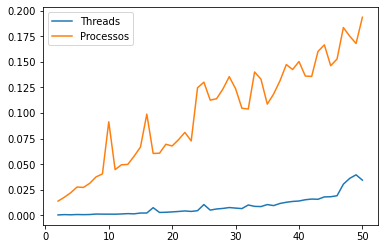

In [20]:
plt.plot(df['n'], df['tempo'], label='Threads')
plt.plot(df2['n'], df2['tempo'], label='Processos')
plt.legend()
plt.show()


## Infos

*multiprocessing* envolve a criação de processos independentes que executam em paralelo. Cada processo tem seu próprio espaço de memória, o que significa que a comunicação entre os processos pode ser mais custosa em termos de desempenho, pois requer compartilhamento de dados entre processos separados. No programa, foi optado pela a criação de um arquivo de texto para armazenar a matriz resultante, pois os processos não compartilham memória. Isso pode ser a causa do tempo elevado de execução do programa com processos em comparação aos resultados obtidos com threads.

